In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "data.xlsx"
data = pd.read_excel(data_path)
print(data.head())

   user_id  test  converted  tot_impr  mode_impr_day  mode_impr_hour
0  1069124     1          0       130              1              20
1  1119715     1          0        93              2              22
2  1144181     1          0        21              2              18
3  1435133     1          0       355              2              10
4  1015700     1          0       276              5              14


In [3]:
data.describe()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
count,5.881010e+05,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.960000,0.025239,24.820876,4.025533,14.469061
std,2.022260e+05,0.195959,0.156850,43.715181,2.004019,4.834634
min,9.000000e+05,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.143190e+06,1.000000,0.000000,4.000000,2.000000,11.000000
50%,1.313725e+06,1.000000,0.000000,13.000000,4.000000,14.000000
75%,1.484088e+06,1.000000,0.000000,27.000000,6.000000,18.000000
max,1.654483e+06,1.000000,1.000000,2065.000000,7.000000,23.000000


# Q1.

In [4]:
total_num_users = data.shape[0]
total_conversions = data[data['converted'] == 1].shape[0]
test_group = data[data['test'] == 1]
control_group = data[data['test'] == 0]
test_group_count, control_group_count = test_group.shape[0],  control_group.shape[0]
converted_from_test_grp = test_group[test_group['converted'] == 1]
converted_from_test_grp_count = converted_from_test_grp.shape[0]
converted_from_control_grp = control_group[control_group['converted'] == 1]
converted_from_control_grp_count = converted_from_control_grp.shape[0]
print(f'Total number of identified users: {total_num_users}')
print(f'Total number of converted users: {total_conversions}\n')
print(f'Total number of users exposed to advertising (Test Group): {test_group_count}')
print(f'Total number of users not exposed to advertising (Control Group): {control_group_count}\n')
print(f'Number of Users that bought the handbag in Test Group: {converted_from_test_grp_count}')
print(f'Number of Users that bought the handbag in Control Group: {converted_from_control_grp_count}\n')

percent_conv_rate_test = converted_from_test_grp_count / test_group_count
percent_conv_rate_control = converted_from_control_grp_count / control_group_count
print(f'Percentage convertion rate of users (Test Group): {round(percent_conv_rate_test * 100, 4)} %')
print(f'Percentage convertion rate of users (Control Group): {round(percent_conv_rate_control * 100, 4)}%')

Total number of identified users: 588101
Total number of converted users: 14843

Total number of users exposed to advertising (Test Group): 564577
Total number of users not exposed to advertising (Control Group): 23524

Number of Users that bought the handbag in Test Group: 14423
Number of Users that bought the handbag in Control Group: 420

Percentage convertion rate of users (Test Group): 2.5547 %
Percentage convertion rate of users (Control Group): 1.7854%


## Discussion Q1 - 

### Was the advertising campaign effective? Did additional consumers convert as a result of the ad campaign?

## Answer 1 - 

Yes, the campaign was effective. In the test group, a conversion rate of 2.5547% was witnessed which is much higher than 1.7854%, the conversion rate of the control group. It was ensured that the size of the control group is sufficient to detect lift. Thus, with 4% control group, we can safely conclude that the results are valid and demonstrate the effectiveness of the ad campaign.

# Q2 (a)

In [5]:
num_users_converted_in_test_group_if_no_ad = percent_conv_rate_control * test_group_count
num_users_converted_in_test_group_with_ad = converted_from_test_grp_count
net__additional_num_user_converted = num_users_converted_in_test_group_with_ad - num_users_converted_in_test_group_if_no_ad
converting_user_worth = 40
print(f"Number of users converted in test group if no ad: {num_users_converted_in_test_group_if_no_ad}")
print(f"Number of users converted in test group with ad: {num_users_converted_in_test_group_with_ad}")
print(f"Net additional numbber of users converted in test group due to ad: {net__additional_num_user_converted}")
print(f"Converting user worth: $ {converting_user_worth}")
total_profit = (net__additional_num_user_converted * converting_user_worth)
print(f"Total profit: $ {round(total_profit, 4)}")

Number of users converted in test group if no ad: 10080.017854106443
Number of users converted in test group with ad: 14423
Net additional numbber of users converted in test group due to ad: 4342.982145893557
Converting user worth: $ 40
Total profit: $ 173719.2858


## Answer 2 (a).

The control group was not sent the ads. 

The number of users in the Test group that TaskaBella would have converted if there were no ads sent would be: the convertion rate without ads times the number of users in the Test group - which is approximately 10,080. Let this be n number of users. n = 10080.

The additional users that TaskaBella was able to convert due to the ad campaign is equal to the number of user converted in Test Group, which is 14423. Let this be m number of users. m = 14423.

The net additional number of users that TaskaBella was able to convert due to ad campaign is n - m = 14423 - 10080 = approx. 4342. 

With each converted user worth $40, and excluding advertising costs, TaskaBella made $173719.2858 more money by running the campaign.

# Q2 (b)

In [6]:
tot_impr = data['tot_impr'].sum()
avg_cpm = 9
total_ad_cost = avg_cpm * (tot_impr / 1000)
print(f"Total number of impressions: {tot_impr}")
print(f"Average CPM: {avg_cpm}")
print(f"Total ad cost: $ {total_ad_cost}")

Total number of impressions: 14597182
Average CPM: 9
Total ad cost: $ 131374.638


## Answer 2 (b).

The total number of impressions were 14,597,182.
The costs of impressions per thousand (CPM) was $9.

The total advertisement cost would thus be (14,597,182 / 1000) * 9 = $131374.638.
This was the cost of the campaign.

# Q2 (c)

In [14]:
net_profit = total_profit - total_ad_cost
total_ROI = (net_profit / total_ad_cost) * 100
print(f"Additional Money made due to ads: $ {round(total_profit, 4)}")
print(f"Total cost of campaign: $ {total_ad_cost}\n")
print(f"Net Profit: $ {round(net_profit, 4)}")
print(f"Total ROI: {round(total_ROI, 4)} %")

Additional Money made due to ads: $ 173719.2858
Total cost of campaign: $ 131374.638

Net Profit: $ 42344.6478
Total ROI: 32.232 %


## Answer 2 (c).

The additional money made due to the ads is $173719.2858.

The total advertisement cost is $131374.638.

Thus, the net profit of the campaign is (total profit - cost) = $42344.6478.


The return on investment (ROI) of the campaign is 32.232%.

Yes, the campaign was profitable as ROI was 32.232%.

# Q2 (d)

In [30]:
total_conversion_in_control_group_if_it_was_test = (control_group_count * percent_conv_rate_test)
curr_converion_control_group = converted_from_control_grp_count
additional_conversion_if_no_control_group = total_conversion_in_control_group_if_it_was_test - curr_converion_control_group
opportunity_cost_if_no_control_group = additional_conversion_if_no_control_group * converting_user_worth
print(f"Total number of conversions in control group with test group convertion rate: {round(total_conversion_in_control_group_if_it_was_test, 4)}")
print(f"Total number of conversions in control group without ads: {curr_converion_control_group}")
print(f"Additional conversions if no control group (one test group with all users): {round(additional_conversion_if_no_control_group, 4)}\n")
print(f"Opportunity cost (no control group): $ {round(opportunity_cost_if_no_control_group, 4)}")

Total number of conversions in control group with test group convertion rate: 600.9573
Total number of conversions in control group without ads: 420
Additional conversions if no control group (one test group with all users): 180.9573

Opportunity cost (no control group): $ 7238.2908


### Let us explore different control group sizes and the changes in opportunity costs

You can change the value of the variable below to see the different effects of having different control group sizes.

In [81]:
# Set the control group size in percentage, e.g. 2 for 2% of user population
control_group_size = 2

In [82]:
new_control_group = (control_group_size / 100) * total_num_users
new_test_group = ((100 - control_group_size) / 100) * total_num_users
print(f"If we change the size of the control group to {control_group_size}% of the user population. Then, the following would happen:\n")
print(f"The number of people in the control group would be {control_group_size}% of the user population: {new_control_group}")
print(f"The number of people in the test group would be {100 - control_group_size}% of the user population: {new_test_group}\n")
new_num_conv_ctrl_grp = new_control_group * percent_conv_rate_control
new_num_conv_test_grp = new_test_group * percent_conv_rate_test
print(f"The number of conversions in the control group would be: {round(new_num_conv_ctrl_grp, 4)}")
print(f"The number of conversions in the test group would be: {round(new_num_conv_test_grp, 4)}")

if control_group_size < 4:
    new_user_in_test_grp = new_test_group - test_group_count
    users_converted_if_in_ctrl_grp = new_user_in_test_grp * percent_conv_rate_control
    users_converted_now_in_test_grp = new_user_in_test_grp * percent_conv_rate_test
    additional_conversions_in_test_grp = users_converted_now_in_test_grp - users_converted_if_in_ctrl_grp
    new_conversions = additional_conversions_in_test_grp

    new_opp_cost = new_conversions * converting_user_worth
    print(f"\nWe had {test_group_count} users in the test group earlier.")
    print(f"Now, we have {new_test_group} users in the test group if we have {control_group_size}% user population in control group instead of 4%.")
    print(f"Out of the {control_group_size}% user population that moved from control group to test group:")
    print(f"{round(users_converted_if_in_ctrl_grp, 4)} users would have converted if they were in the control group.")
    print(f"Now {round(users_converted_now_in_test_grp, 4)} convert in the test group due to the higher conversion rate.")
    print(f"Additional users converted is {round(additional_conversions_in_test_grp, 4)}.\n")
    print(f"New opportunity cost is $ {round(new_opp_cost, 4)}.")


If we change the size of the control group to 2% of the user population. Then, the following would happen:

The number of people in the control group would be 2% of the user population: 11762.02
The number of people in the test group would be 98% of the user population: 576338.98

The number of conversions in the control group would be: 210.0004
The number of conversions in the test group would be: 14723.4781

We had 564577 users in the test group earlier.
Now, we have 576338.98 users in the test group if we have 2% user population in control group instead of 4%.
Out of the 2% user population that moved from control group to test group:
209.9996 users would have converted if they were in the control group.
Now 300.4781 convert in the test group due to the higher conversion rate.
Additional users converted is 90.4785.

New opportunity cost is $ 3619.1392.


## Answer 2 (d).

Assuming that there was no control group, we would see the conversion rate of the test group for the current control group as well. 

The total number of conversions is the control group without ads is 420. If there was no control group, for the same 4% of the population we currently have in the control group, we would see the conversion rate of test group. This would make the total number of conversions for that 4% population, the current control group to be approximately 600.

The additional conversions we would have if there was no control group are approximately 180. 

Thus, the opportunity cost (no control group) would be $7238.2908

Similarly, after analysing differen control group sizes, we found the following opportunity costs:

Control group population size and corresponsing opportunity costs:

0% - $ 7238.2908

1% - $ 5428.715

2% - $ 3619.1392

3% - $ 1809.5635


# Q3 (a)

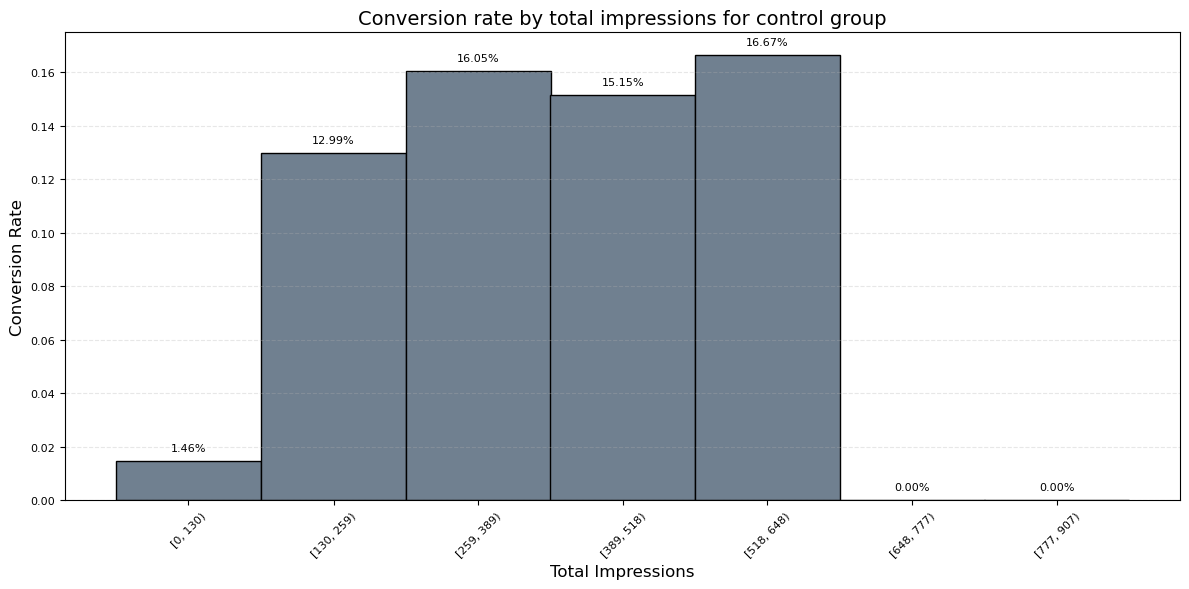

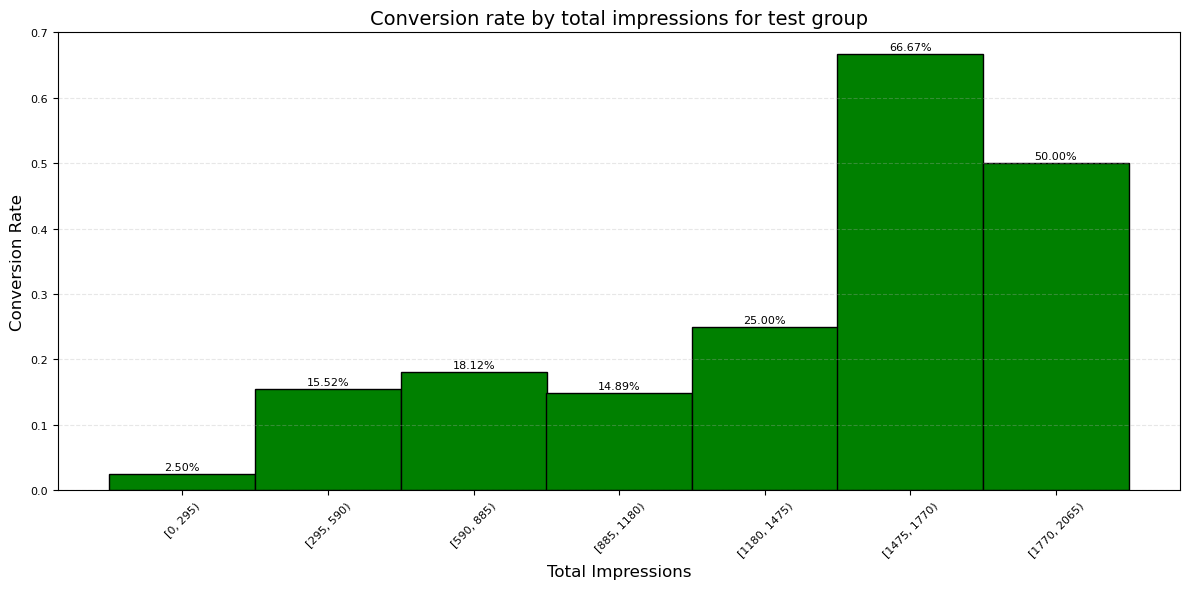

In [9]:
def plot_q3(df, grp, num_buckets, color):
    df['impr_bucket'] = pd.cut(df['tot_impr'], bins=num_buckets)
    grouped = df.groupby('impr_bucket')['converted'].agg(['sum', 'count']).reset_index()
    grouped['conversion_rate'] = grouped['sum'] / grouped['count']
    grouped['bucket_midpoint'] = grouped['impr_bucket'].apply(lambda x: (x.left + x.right) / 2)
    plt.figure(figsize=(12, 6))

    bars = plt.bar(grouped['bucket_midpoint'], grouped['conversion_rate'], 
                   width=(grouped['bucket_midpoint'][1] - grouped['bucket_midpoint'][0]), 
                   color=color, edgecolor='black')

    # Adding text labels on top of bars
    for bar, rate in zip(bars, grouped['conversion_rate']):
        # Only adding text if the rate is finite
        if not (np.isnan(rate) or np.isinf(rate)):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.003, 
                     f"{rate:.2%}", ha='center', va='bottom', fontsize=8, color='black')

    x_ticks = grouped['bucket_midpoint']
    x_labels = [f"[{0 if i == 0 else int(interval.left)}, {int(interval.right)})" for i, interval in enumerate(grouped['impr_bucket'])]

    plt.xticks(x_ticks, x_labels, fontsize=10, rotation=45)

    plt.title(f"Conversion rate by total impressions for {grp} group", fontsize=14)
    plt.xlabel("Total Impressions", fontsize=12)
    plt.ylabel("Conversion Rate", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()

buckets = 7
plot_q3(control_group.copy(), 'control', buckets, 'slategrey')
plot_q3(test_group.copy(), 'test', buckets, 'green')

In [10]:
data

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588096,1278437,1,0,1,2,23
588097,1327975,1,0,1,2,23
588098,1038442,1,0,3,2,23
588099,1496395,1,0,1,2,23


# Q4. (a)

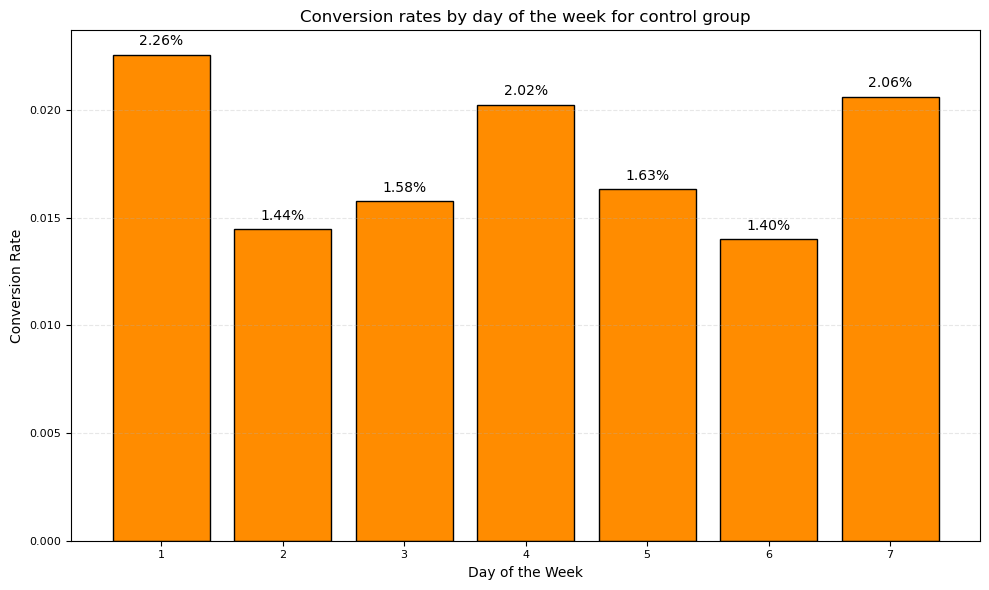

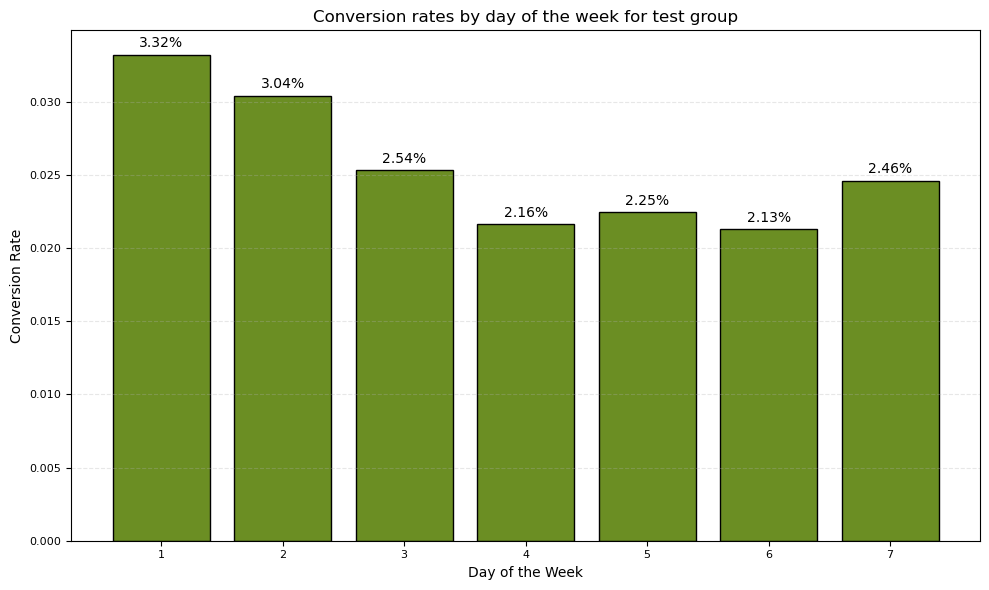

In [11]:
def plot_q4(df, grp, time_col, color):
    day_summary = df.groupby(time_col)['converted'].agg(['sum', 'count']).reset_index()
    day_summary['conversion_rate'] = day_summary['sum'] / day_summary['count']
    day_summary.sort_values(time_col, inplace=True)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(day_summary[time_col], day_summary['conversion_rate'], color=color, edgecolor='black')
    for bar, rate in zip(bars, day_summary['conversion_rate']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0003, 
                f"{rate:.2%}", ha='center', va='bottom', fontsize=10, color='black')
        
    plt.title(f"Conversion rates by day of the week for {grp} group", fontsize=12)
    plt.xlabel("Day of the Week", fontsize=10)
    plt.ylabel("Conversion Rate", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

day_col = 'mode_impr_day'
plot_q4(control_group.copy(), 'control', day_col, 'darkorange')
plot_q4(test_group.copy(), 'test', day_col, 'olivedrab')

# Q4. (b)

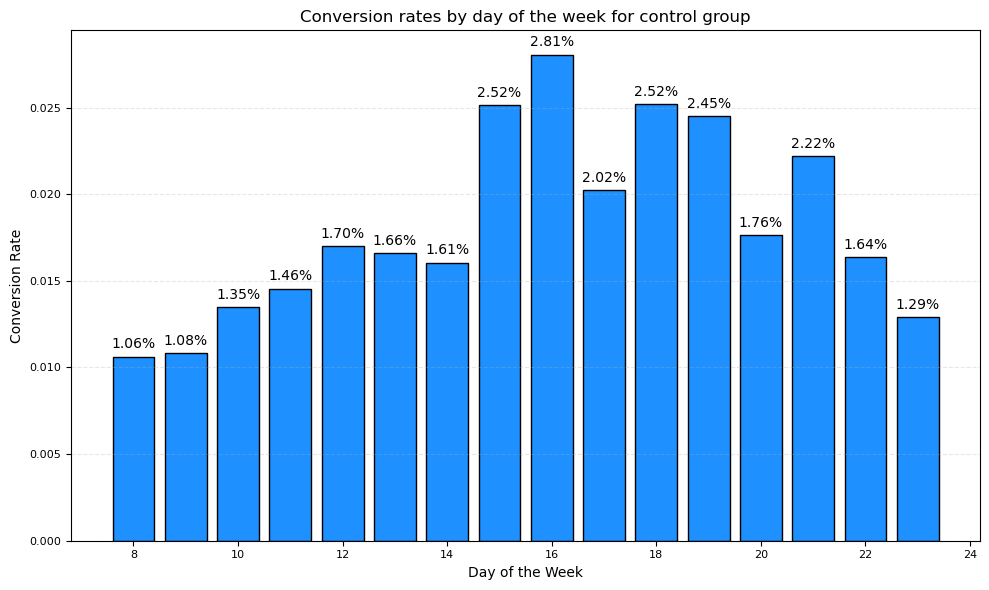

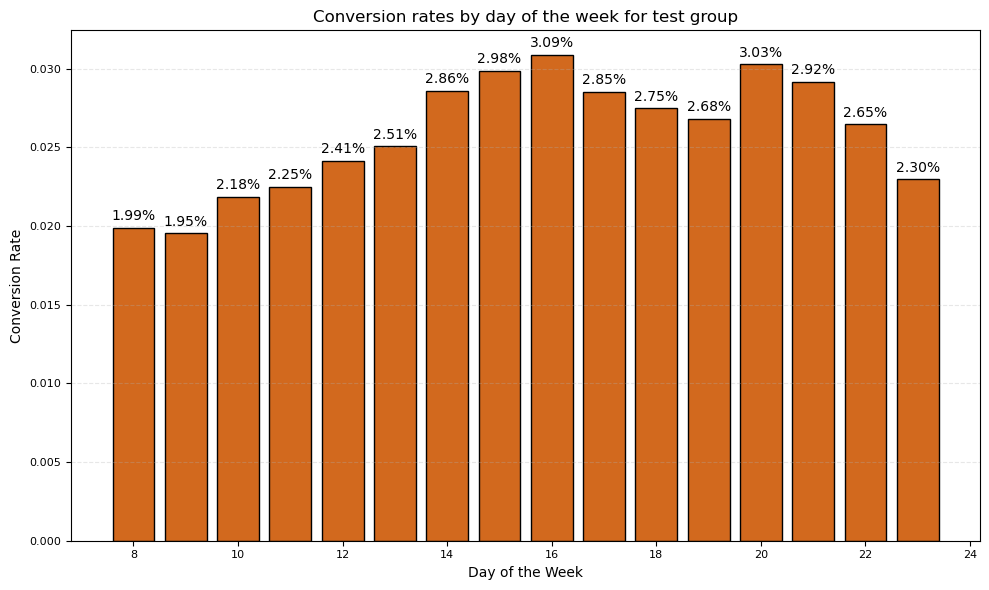

In [12]:
# exclude hours btw midnight and 8 AM
def filter_df(data, hour_col):
    df = data[data[hour_col].between(8, 23, inclusive="both")]
    return df

hour_col = 'mode_impr_hour'
plot_q4(filter_df(control_group.copy(), hour_col), 'control', hour_col, 'dodgerblue')
plot_q4(filter_df(test_group.copy(), hour_col), 'test', hour_col, 'chocolate')